In [1]:
import pandas as pd
df = pd.read_csv("D:/CodeBeatsBorders/MatplotLib/Netflix project/netflix_titles.csv")
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [2]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [3]:
df = df.dropna(subset=['type','release_year','rating','country','duration'])

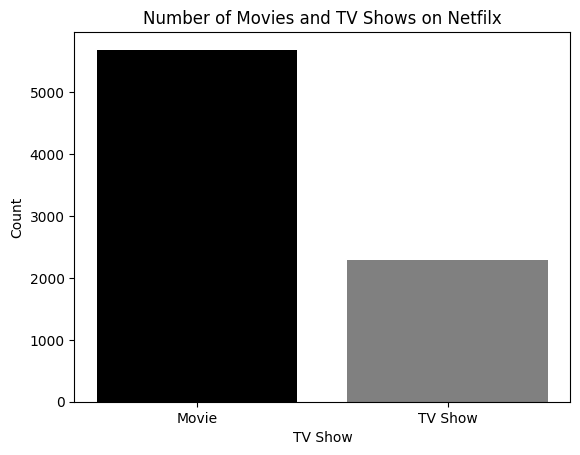

<Figure size 800x400 with 0 Axes>

In [4]:
#How many Movies vs TV Shows --> Bar Chart
import matplotlib.pyplot as plt
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values, color=['black','grey'])
plt.title("Number of Movies and TV Shows on Netfilx")
plt.xlabel("TV Show")
plt.ylabel("Count")
plt.figure(figsize=(8,4))
plt.tight_layout()
plt.savefig('Movies Vs TV Shows.png')
plt.show()

rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64


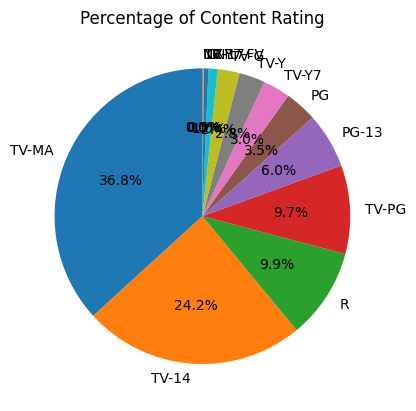

<Figure size 1000x800 with 0 Axes>

In [5]:
#What is the percentage of each content rating (PG,R, TV-MA) --> Pie Chart
import matplotlib.pyplot as plt
rating_counts=df['rating'].value_counts()
print(rating_counts)
plt.pie(rating_counts, labels=rating_counts.index, autopct = '%1.1f%%',startangle=90)
plt.title("Percentage of Content Rating")
plt.figure(figsize = (10,8))
plt.tight_layout()

plt.savefig('Percentage of Content Rating.png')
plt.show()

release_year
2018    1038
2017     965
2019     913
2020     852
2016     838
        ... 
1969       2
1961       1
1959       1
1966       1
1947       1
Name: count, Length: 73, dtype: int64


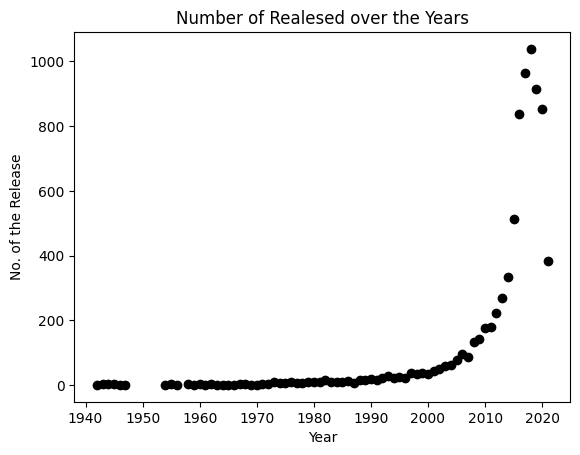

In [6]:
#How has the number of released changed over the years
import matplotlib.pyplot as plt
df.columns
df.head(2)
release = df['release_year'].value_counts()
print(release)
plt.scatter(release.index, release.values, color='black', marker = 'o')
plt.title("Number of Realesed over the Years")
plt.xlabel("Year")
plt.ylabel("No. of the Release")
plt.savefig('Number of Realesed over the Years.png')
plt.show()

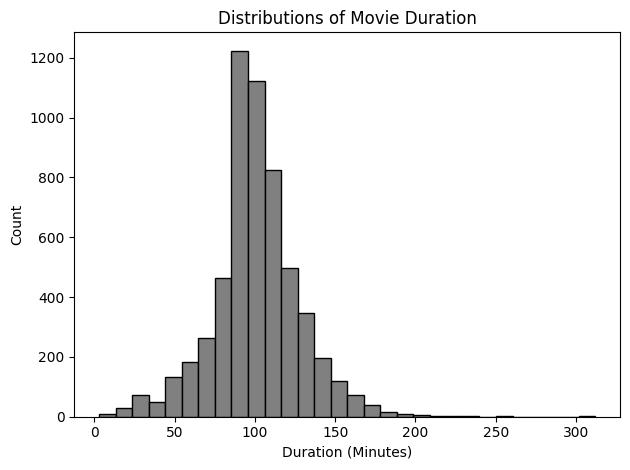

In [7]:
#What is the distribution of movie durations
import matplotlib.pyplot as plt
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min'," ").astype(int)
plt.hist(movie_df['duration_int'], bins=30, color = 'grey', edgecolor = 'black')
plt.title("Distributions of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('Distribution of Movie Duration.png')
plt.show()

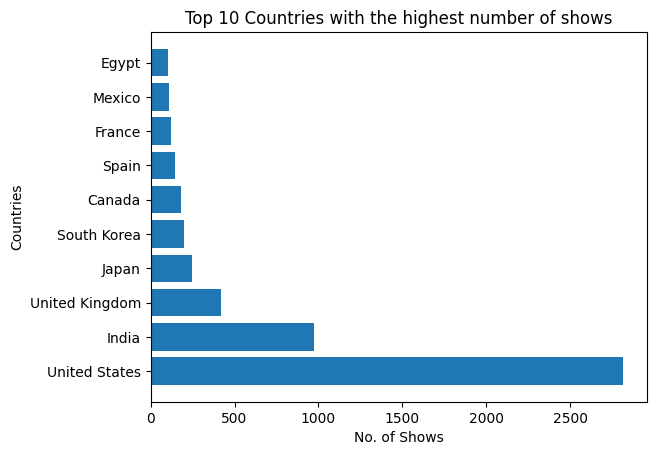

In [8]:
# Top 10 countries with the highest number of shows -->
import matplotlib.pyplot as plt
df.head(2)
countries = df['country'].value_counts().head(10)
plt.barh(countries.index, countries.values)
plt.title("Top 10 Countries with the highest number of shows")
plt.ylabel("Countries")
plt.xlabel("No. of Shows")
plt.savefig('Top10 Countries with highest number of shows.png')
plt.show()

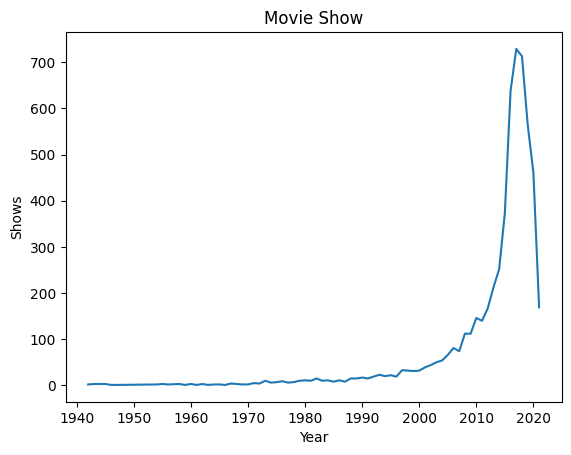

In [9]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
plt.plot(content_by_year.index, content_by_year['Movie'])
plt.title("Movie Show")
plt.ylabel("Shows")
plt.xlabel("Year")
plt.savefig('MovieShow.png')
plt.show()